In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import csv

In [71]:
# Potential changes that could be made: changing ten_percent to a float.
depleted = ['87', '99', '160', '190A', '190B', '190C', '190D']
for i in range(190, 200):
    depleted.append(str(i))
def clean_data(dataframe_placeholder):
    dataframe_placeholder = dataframe_placeholder.dropna()
    dataframe_placeholder = dataframe_placeholder[dataframe_placeholder['subj_course_id'].str.startswith('COGS')]
    clean = dataframe_placeholder.assign(ten_percent=dataframe_placeholder['total'] * 0.1,
                                         course_id=dataframe_placeholder['subj_course_id'].str.split().str[1],
                                         time=pd.to_datetime(dataframe_placeholder['time'], unit='ms'))
    # This removes course series endings such as the 'a' in Cogs 107a to check for certain classes that we want to remove.
    # Dropping specific classes such as cogs 190a or cogs 99
    clean = clean[(clean['course_id'].isin(depleted)) == False]
    clean = clean[((clean.course_id.apply(len) > 2) & (clean.course_id.str[0] == '2')) == False]
    return clean.drop(['subj_course_id'], axis=1)

In [72]:
def combine_df_by_time(df_lists: list):
    clean_datasets = pd.concat(df_lists, ignore_index=True).sort_values('time').reset_index()
    return clean_datasets

In [73]:
def file_paths(folder):
    # ONLY RETURNS FILES WITH DATA INSIDE
    term = []

    for files in os.listdir(folder):
        reader = csv.reader(files)
        num_columns = len(next(reader))  # Get number of columns from the first row
        if files.endswith('.csv') and os.path.getsize(f'{folder}/' + files) > 1000 and len(
                list(reader)[-1]) == num_columns:
            term.append(f'{folder}/' + str(files))
    return term




In [74]:
def make_clean_df(paths):
    # Reads and applies cleaning to every file.
    return [clean_data(pd.read_csv(item)) for item in paths]

In [75]:
fa22_file = file_paths(r"D:\2022Fall-main\raw")
wi23_file = file_paths('C:/Users/ALEX/PycharmProjects/Statistics/raw')
sp23_file = file_paths(r"C:\Users\ALEX\Downloads\2023Spring-main\2023Spring-main\raw")
fa23_file = file_paths(r"C:\Users\ALEX\Downloads\2023Fall-main\2023Fall-main\raw")
wi24_file = file_paths(r"C:\Users\ALEX\Downloads\2024Winter-main\2024Winter-main\raw")
sp24_file = file_paths(r"C:\Users\ALEX\Downloads\2024Spring-main\2024Spring-main\raw")

## The Cells Below will take anywhere from 5 minutes to 50 minutes to load. If you want to reproduce our results, change the file paths to the file location of the raw folders for each respective quarter

In [76]:
fa22_df = make_clean_df(fa22_file)

In [77]:
wi23_df = make_clean_df(wi23_file)

In [78]:
sp23_df = make_clean_df(sp23_file)

In [79]:
fa23_df = make_clean_df(fa23_file)

In [80]:
wi24_df = make_clean_df(wi24_file)

In [81]:
sp24_df = make_clean_df(sp24_file)

In [82]:
fa22_joined = combine_df_by_time(fa22_df)
wi23_joined = combine_df_by_time(wi23_df)
sp23_joined = combine_df_by_time(sp23_df)
fa23_joined = combine_df_by_time(fa23_df)
wi24_joined = combine_df_by_time(wi24_df)
sp24_joined = combine_df_by_time(sp24_df)


In [294]:
### Try to run just this cell if you need to Reload the dataframe
fa22 = fa22_joined
wi23 = wi23_joined
sp23 = sp23_joined
fa23 = fa23_joined
wi24 = wi24_joined
sp24 = sp24_joined

In [295]:
fa22

,index,time,sec_code,sec_id,prof,available,waitlist,total,enrolled_ct,ten_percent,course_id
0,0,2022-05-18 11:31:14.955,A01,87834,Barrera; Steven James,60,0,60,0,6.0,1
1,1,2022-05-18 11:31:14.955,A02,87835,Barrera; Steven James,60,0,60,0,6.0,1
2,2,2022-05-18 11:31:14.955,A03,87836,Barrera; Steven James,60,0,60,0,6.0,1
3,3,2022-05-18 11:31:14.955,A04,87837,Barrera; Steven James,60,0,60,0,6.0,1
4,4,2022-05-18 11:31:14.955,A05,87838,Barrera; Steven James,60,0,60,0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2718775,2718776,2022-11-06 02:38:52.409,A03,87871,Johnson; Christine M.,0,3,50,54,5.0,17
2718776,2718778,2022-11-06 02:38:52.409,A05,87873,Johnson; Christine M.,1,2,50,49,5.0,17
2718777,2718774,2022-11-06 02:38:52.409,A01,87869,Johnson; Christine M.,1,3,69,68,6.9,17
2718778,2718775,2022-11-06 02:38:52.409,A02,87870,Johnson; Christine M.,0,3,50,50,5.0,17


In [296]:
wi23.head()

,index,time,sec_code,sec_id,prof,available,waitlist,total,enrolled_ct,ten_percent,course_id
0,0,2022-11-06 03:11:08.407,A01,107920,Boyle; Mary E. T.,60,0,60,0,6.0,1
1,1,2022-11-06 03:11:08.407,A02,107921,Boyle; Mary E. T.,60,0,60,0,6.0,1
2,2,2022-11-06 03:11:08.407,A03,107922,Boyle; Mary E. T.,60,0,60,0,6.0,1
3,3,2022-11-06 03:11:08.407,A04,107923,Boyle; Mary E. T.,60,0,60,0,6.0,1
4,4,2022-11-06 03:11:08.407,A05,107924,Boyle; Mary E. T.,60,0,60,0,6.0,1


In [297]:
sp23.head()

,index,time,sec_code,sec_id,prof,available,waitlist,total,enrolled_ct,ten_percent,course_id
0,0,2023-02-16 12:19:47.105,A01,123461,Barrera; Steven James,60.0,0.0,60.0,0.0,6.0,1
1,1,2023-02-16 12:19:47.105,A02,123467,Barrera; Steven James,60.0,0.0,60.0,0.0,6.0,1
2,2,2023-02-16 12:19:47.105,A03,123472,Barrera; Steven James,60.0,0.0,60.0,0.0,6.0,1
3,3,2023-02-16 12:19:47.105,A04,123525,Barrera; Steven James,60.0,0.0,60.0,0.0,6.0,1
4,4,2023-02-16 12:19:47.105,A05,123597,Barrera; Steven James,60.0,0.0,60.0,0.0,6.0,1


In [298]:
fa23.head()

,index,time,sec_code,sec_id,prof,available,waitlist,total,enrolled_ct,ten_percent,course_id
0,0,2023-05-25 08:15:16.104,A01,267223,Staff,56,0,56,0,5.6,1
1,1,2023-05-25 08:15:16.104,A02,267224,Staff,56,0,56,0,5.6,1
2,2,2023-05-25 08:15:16.104,A03,267307,Staff,56,0,56,0,5.6,1
3,3,2023-05-25 08:15:16.104,A04,267308,Staff,56,0,56,0,5.6,1
4,4,2023-05-25 08:15:16.104,A05,267311,Staff,56,0,56,0,5.6,1


In [299]:
wi24.course_id.unique()

array(['1', '2', '8', '9', '10', '11', '13', '14A', '14B', '17', '18',
       '100', '101A', '101B', '107B', '108', '111', '118B', '118C', '123',
       '150', '153', '156', '163', '164', '165', '170', '172', '177',
       '181', '187B'], dtype=object)

In [300]:
sp24.head()

,index,time,sec_code,sec_id,prof,available,waitlist,total,enrolled_ct,ten_percent,course_id
0,0,2024-02-16 12:28:56.489,A01,407484.0,Boyle; Mary E. T.,60.0,0.0,60.0,0.0,6.0,1
1,1,2024-02-16 12:28:56.489,A02,407498.0,Boyle; Mary E. T.,60.0,0.0,60.0,0.0,6.0,1
2,2,2024-02-16 12:28:56.489,A03,407504.0,Boyle; Mary E. T.,60.0,0.0,60.0,0.0,6.0,1
3,3,2024-02-16 12:28:56.489,A04,407512.0,Boyle; Mary E. T.,60.0,0.0,60.0,0.0,6.0,1
4,4,2024-02-16 12:28:56.489,A05,407513.0,Boyle; Mary E. T.,60.0,0.0,60.0,0.0,6.0,1


## We need to make the start and stop times based on the quarter.

In [301]:
waitlist_interval = {
    'FA22':[pd.Timestamp('2022-05-28'), pd.Timestamp('2022-10-06')],
    'WI23':[pd.Timestamp('2022-11-14'), pd.Timestamp('2023-01-19')],
    'SP23':[pd.Timestamp('2023-02-27'), pd.Timestamp('2023-04-13')],
    'FA23':[pd.Timestamp('2023-06-03'), pd.Timestamp('2023-10-12')],
    'WI24':[pd.Timestamp('2023-11-21'), pd.Timestamp('2024-01-18')],
    'SP24':[pd.Timestamp('2024-02-26'), pd.Timestamp('2024-04-11')]
}

In [302]:
def within_interval(df, termname):
    return df[(df['time'] > waitlist_interval[termname][0]) & (df['time'] < waitlist_interval[termname][1])].reset_index().drop(['index', 'level_0'], axis=1)

In [303]:
fa22 = within_interval(fa22, 'FA22')
wi23 = within_interval(wi23, 'WI23')
sp23 = within_interval(sp23, 'SP23')
fa23 = within_interval(fa23, 'FA23')
wi24 = within_interval(wi24, 'WI24')
sp24 = within_interval(sp24, 'SP24')

In [304]:
fa23

,time,sec_code,sec_id,prof,available,waitlist,total,enrolled_ct,ten_percent,course_id
0,2023-06-03 00:09:19.579,A06,267320,Staff,23,0,56,33,5.6,1
1,2023-06-03 00:09:19.579,A05,267311,Staff,29,0,56,27,5.6,1
2,2023-06-03 00:09:19.579,A04,267308,Staff,52,0,56,4,5.6,1
3,2023-06-03 00:09:19.579,A07,267331,Staff,45,0,56,11,5.6,1
4,2023-06-03 00:09:19.579,A02,267224,Staff,31,0,56,25,5.6,1
...,...,...,...,...,...,...,...,...,...,...
1545833,2023-10-11 23:49:33.363,A01,268979,Ellis; Shannon Elizabeth,0,18,70,72,7.0,137
1545834,2023-10-11 23:49:33.791,A01,268981,Johnson; Christine M.,0,4,40,41,4.0,143
1545835,2023-10-11 23:49:34.215,A01,301152,Nunez; Rafael E,19,0,56,37,5.6,152
1545836,2023-10-11 23:49:34.641,A00,268989,Trott; Sean Thomas,0,8,104,116,10.4,153


### We might might want to remove the cell below. It has all of the code that doesn't affect the dataframe in any way.

In [305]:
"""
change = np.array([0])
t = winter_2023[(winter_2023['sec_id'] == 99958)]
for i in range(1,t.shape[0]):
    change = np.append(change, (t.iloc[i]['enrolled_ct'] != t.iloc[i-1]['enrolled_ct']))
#
winter_2023[(winter_2023['sec_id'] == 99958)]
#
t = t.assign(change = change)
changes = t[t['change'] == 1]
#
total = 0
for i in range(0, changes.shape[0]):
    if changes.iloc[i]['available'] < changes.iloc[i-1]['available']:
        total = total + changes.iloc[i-1]['available']
total
#
sections = winter_2023['sec_id'].unique()
sections
#
by_class = []
for i in winter_2023['sec_id'].unique():
    by_class.append([winter_2023[winter_2023['sec_id'] == i].iloc[0].course_id, winter_2023[winter_2023['sec_id'] == i].iloc[0].sec_code])
print(by_class)
#
people_who_get_in = []
for i in sections:
    output = students_from_waitlist(i)
    people_who_get_in.append(([i, output]))
#
key = {i[0]:i[1] for i in people_who_get_in}
#
winter23 = winter_2023.assign(actual = winter_2023['sec_id'].map(key))
#
winter23
#
"""

"\nchange = np.array([0])\nt = winter_2023[(winter_2023['sec_id'] == 99958)]\nfor i in range(1,t.shape[0]):\n    change = np.append(change, (t.iloc[i]['enrolled_ct'] != t.iloc[i-1]['enrolled_ct']))\n#\nwinter_2023[(winter_2023['sec_id'] == 99958)]\n#\nt = t.assign(change = change)\nchanges = t[t['change'] == 1]\n#\ntotal = 0\nfor i in range(0, changes.shape[0]):\n    if changes.iloc[i]['available'] < changes.iloc[i-1]['available']:\n        total = total + changes.iloc[i-1]['available']\ntotal\n#\nsections = winter_2023['sec_id'].unique()\nsections\n#\nby_class = []\nfor i in winter_2023['sec_id'].unique():\n    by_class.append([winter_2023[winter_2023['sec_id'] == i].iloc[0].course_id, winter_2023[winter_2023['sec_id'] == i].iloc[0].sec_code])\nprint(by_class)\n#\npeople_who_get_in = []\nfor i in sections:\n    output = students_from_waitlist(i)\n    people_who_get_in.append(([i, output]))\n#\nkey = {i[0]:i[1] for i in people_who_get_in}\n#\nwinter23 = winter_2023.assign(actual = wint

We Are Removing Cogs 137 because they increased the class size.

In [306]:
"""
def students_from_waitlisst(section):
    return False
    change = np.array([0])
    filt_df = winter_2023[(winter_2023['sec_id'] == section) & (winter_2023['waitlist'] > 0)]
    filt_df = filt_df.assign(changes = filt_df.enrolled_ct)
    for i in range(1,t.shape[0]):
        change = np.append(change, (t.iloc[i]['enrolled_ct'] != t.iloc[i-1]['enrolled_ct']))
    t = t.assign(change = change)
    changes = t[t['change'] == 1]
    total = 0
    for i in range(0, changes.shape[0]):
        if changes.iloc[i]['available'] < changes.iloc[i-1]['available']:
            total = total + changes.iloc[i-1]['available']
    return total
"""

"\ndef students_from_waitlisst(section):\n    return False\n    change = np.array([0])\n    filt_df = winter_2023[(winter_2023['sec_id'] == section) & (winter_2023['waitlist'] > 0)]\n    filt_df = filt_df.assign(changes = filt_df.enrolled_ct)\n    for i in range(1,t.shape[0]):\n        change = np.append(change, (t.iloc[i]['enrolled_ct'] != t.iloc[i-1]['enrolled_ct']))\n    t = t.assign(change = change)\n    changes = t[t['change'] == 1]\n    total = 0\n    for i in range(0, changes.shape[0]):\n        if changes.iloc[i]['available'] < changes.iloc[i-1]['available']:\n            total = total + changes.iloc[i-1]['available']\n    return total\n"

In [309]:
def students_from_waitlist(df_quarter):
    people_who_get_in = []
    # This removes classes that are cancelled. Because this would change how many people enroll in a class, and at a certain time. I've decided to remove these, because otherwise the number of people enrolled is calculated incorrectly.
    bad = df_quarter[((df_quarter.total == 0) & (df_quarter.enrolled_ct > 0))].sec_id.unique()
    df_quarter = df_quarter[df_quarter.sec_id.isin(bad) == False]
    for ind in df_quarter['sec_id'].unique():
        # Each unique section in a given dataframe undergoes the code below
        # This is the unique_sections given by class and section
        # This gets classes where there are people on the waitlist and the section matches the given section.
        section = df_quarter[(df_quarter['sec_id'] == ind) & (df_quarter['waitlist'] > 0)]
        
        # this finds when there is a change
        section = section.assign(changes = section.enrolled_ct.diff().ne(0).astype(int))
        
        change_points = section[section.changes == 1].reset_index(drop=True)
        
        total = 0
        # This loops over all of the change points and sees if there is a change
        for i in range(1, len(change_points)):
            if change_points.available[i] != change_points.available[i-1]:
                total = total + change_points.available[i-1]
        people_who_get_in.append(([ind, total]))
    # Map it back to the df
    key = {k[0]:k[1] for k in people_who_get_in}
    df_quarter = df_quarter.assign(from_waitlist = df_quarter['sec_id'].map(key)) 
    return df_quarter

In [310]:
fa22_final = students_from_waitlist(fa22)
wi23_final = students_from_waitlist(wi23)
sp23_final = students_from_waitlist(sp23)
fa23_final = students_from_waitlist(fa23)
wi24_final = students_from_waitlist(wi24)
sp24_final = students_from_waitlist(sp24)

In [311]:
wi24_final.from_waitlist.unique()

array([ 3,  4,  1, 15, 11, 10,  6,  5,  2,  9, 31,  0, 17,  8,  7, 12, 29,
       22, 14, 25, 50, 49, 24, 16], dtype=int64)

In [312]:
# How much of the data is left?
def compression(df1, df2):
    return df1.shape[0]/df2.shape[0]

fa22_comp = compression(fa22_final, fa22_joined)
wi23_comp = compression(wi23_final, wi23_joined)
sp23_comp = compression(sp23_final, sp23_joined)
fa23_comp = compression(fa23_final, fa23_joined)
wi24_comp = compression(wi24_final, wi24_joined)
sp24_comp = compression(sp24_final, sp24_joined)
total_compression = np.array([fa22_comp, wi23_comp, sp23_comp, fa23_comp, wi24_comp, sp24_comp])
# About 75%

In [313]:
total_compression.mean()

0.5970847281585174

In [315]:
fa23_final.groupby('sec_id').max()

,time,sec_code,prof,available,waitlist,total,enrolled_ct,ten_percent,course_id,from_waitlist
sec_id,,,,,,,,,,
254490,2023-10-11 23:49:27.808,A01,Borgo; David Garcia,5,3,6,6,0.6,20,3
254493,2023-10-11 23:49:27.808,A02,Borgo; David Garcia,5,7,6,6,0.6,20,4
254494,2023-10-11 23:49:27.808,A03,Borgo; David Garcia,5,4,8,8,0.8,20,3
256222,2023-10-11 23:49:30.800,A01,Deak; Gedeon O.,32,7,35,42,3.5,110,6
256256,2023-10-11 23:49:30.800,A02,Deak; Gedeon O.,30,7,35,42,3.5,110,3
...,...,...,...,...,...,...,...,...,...,...
351961,2023-10-11 23:49:27.383,B04,Staff,33,6,33,34,3.3,18,0
351965,2023-10-11 23:49:27.383,B05,Staff,34,6,34,35,3.4,18,6
351966,2023-10-11 23:49:27.383,B06,Staff,34,6,34,35,3.4,18,4


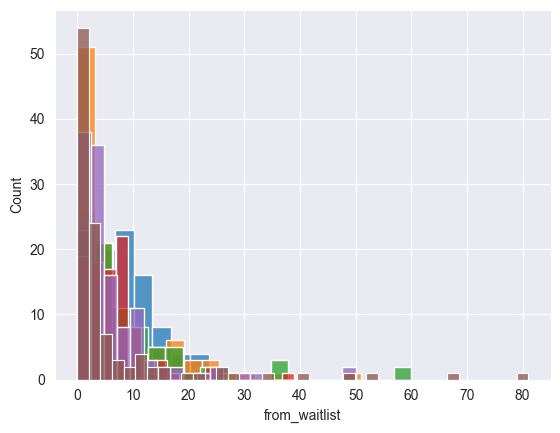

In [316]:
sns.histplot(data=fa22_final.groupby('sec_id').max(), x='from_waitlist')
sns.histplot(data=wi23_final.groupby('sec_id').max(), x='from_waitlist')
sns.histplot(data=sp23_final.groupby('sec_id').max(), x='from_waitlist')
sns.histplot(data=fa23_final.groupby('sec_id').max(), x='from_waitlist')
sns.histplot(data=wi24_final.groupby('sec_id').max(), x='from_waitlist')
sns.histplot(data=sp24_final.groupby('sec_id').max(), x='from_waitlist')
plt.show()

In [318]:
fa23_final.groupby('sec_id').max().sort_values(by='from_waitlist', ascending=False)

,time,sec_code,prof,available,waitlist,total,enrolled_ct,ten_percent,course_id,from_waitlist
sec_id,,,,,,,,,,
370104,2023-10-11 23:49:26.957,A07,Johnson; Christine M.,40,2,40,32,4.0,17,39
268407,2023-10-11 23:49:26.532,A02,Bergen; Benjamin,57,5,60,61,6.0,15,25
268229,2023-10-11 23:49:26.105,A02,Barrera; Steven James,15,8,75,83,7.5,14B,23
267224,2023-10-11 23:49:22.695,A02,Staff,31,25,56,61,5.6,1,18
268734,2023-10-11 23:49:29.517,A05,Barrera; Steven James,15,14,75,81,7.5,101A,16
...,...,...,...,...,...,...,...,...,...,...
301152,2023-10-11 23:49:34.215,A01,Nunez; Rafael E,56,0,56,42,5.6,152,0
351961,2023-10-11 23:49:27.383,B04,Staff,33,6,33,34,3.3,18,0
268958,2023-10-11 23:49:32.080,A02,Tu; Zhuowen,41,1,60,54,6.0,118A,0


In [319]:
def size_changes(df):
    class_size_changes = df.groupby('sec_id').nunique().reset_index()
    class_size_changes = class_size_changes.get(['sec_id', 'total'])
    change_class = {i[0]:(i[1] - 1) for i in np.array(class_size_changes)}
    df = df.assign(size_change = df['sec_id'].map(change_class))
    return df

fa22_final = size_changes(fa22_final)
wi23_final = size_changes(wi23_final)
sp23_final = size_changes(sp23_final)
fa23_final = size_changes(fa23_final)
wi24_final = size_changes(wi24_final)
sp24_final = size_changes(sp24_final)

In [330]:
fa22_final.size_change.unique()

array([0, 1, 4, 2, 3], dtype=int64)

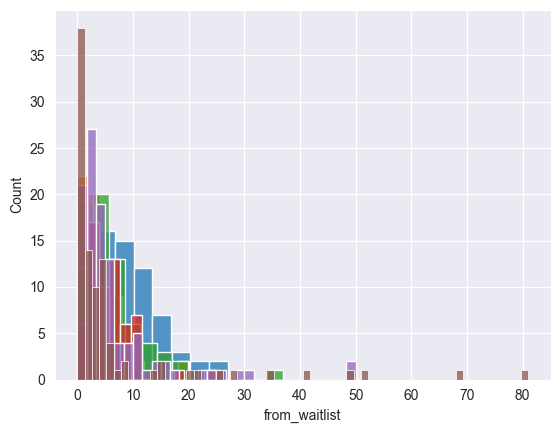

In [331]:
num_of_changes = 0
fa22_no_size_change = fa22_final[fa22_final.size_change == num_of_changes]
wi23_no_size_change = wi23_final[wi23_final.size_change == num_of_changes]
sp23_no_size_change = sp23_final[sp23_final.size_change == num_of_changes]
fa23_no_size_change = fa23_final[fa23_final.size_change == num_of_changes]
wi24_no_size_change = wi24_final[wi24_final.size_change == num_of_changes]
sp24_no_size_change = sp24_final[sp24_final.size_change == num_of_changes]
sns.histplot(data=fa22_no_size_change.groupby('sec_id').max(), x='from_waitlist')
sns.histplot(data=wi23_no_size_change.groupby('sec_id').max(), x='from_waitlist')
sns.histplot(data=sp23_no_size_change.groupby('sec_id').max(), x='from_waitlist')
sns.histplot(data=fa23_no_size_change.groupby('sec_id').max(), x='from_waitlist')
sns.histplot(data=wi24_no_size_change.groupby('sec_id').max(), x='from_waitlist')
sns.histplot(data=sp24_no_size_change.groupby('sec_id').max(), x='from_waitlist')
plt.show()

-58.0 20.0 -0.5999999999999996 -2.0812524689727834 7.025154618340058 [-4.3, 2.6]


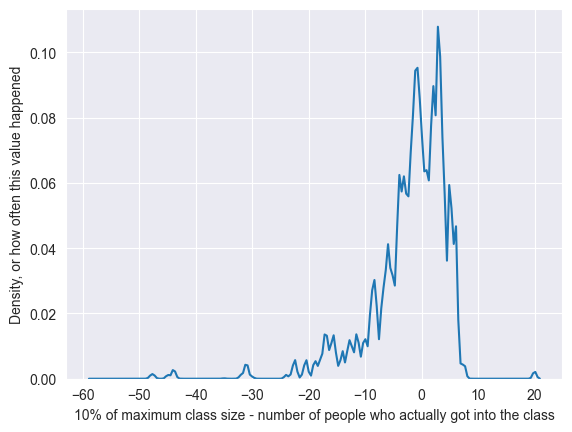

In [359]:
# People expected - people who got in.
# If negative, then more people got in than we expected
# If positive, then fewer people got in than we expected
fa22_diff = fa22_final.ten_percent - fa22_final.from_waitlist
wi23_diff = wi23_final.ten_percent - wi23_final.from_waitlist 
sp23_diff = sp23_final.ten_percent - sp23_final.from_waitlist
fa23_diff = fa23_final.ten_percent - fa23_final.from_waitlist
wi24_diff = wi24_final.ten_percent - wi24_final.from_waitlist
sp24_diff = sp24_final.ten_percent - sp24_final.from_waitlist
all_quarters = pd.concat([fa22_diff, wi23_diff, sp23_diff, fa23_diff, wi24_diff])
np.sort(all_quarters)
expected = [np.percentile(all_quarters, 25), np.percentile(all_quarters, 75)]
print(all_quarters.min(), all_quarters.max(), all_quarters.median(), all_quarters.mean(), all_quarters.std(), expected)
sns.kdeplot(data=all_quarters)
plt.xlabel('10% of maximum class size - number of people who actually got into the class')
plt.ylabel('Density, or how often this value happened')
plt.show()

In [360]:
fa22_final.to_csv(r"D:\Quarters\fa22_time.csv")
wi23_final.to_csv(r"D:\Quarters\wi23_time.csv")
sp23_final.to_csv(r"D:\Quarters\sp23_time.csv")
fa23_final.to_csv(r"D:\Quarters\fa23_time.csv")
wi24_final.to_csv(r"D:\Quarters\wi24_time.csv")
sp24_final.to_csv(r"D:\Quarters\sp24_time.csv")

In [361]:
fa22_simple = fa22_final.drop(['time', 'available', 'waitlist', 'enrolled_ct'], axis=1).groupby('sec_id').max()
wi23_simple = wi23_final.drop(['time', 'available', 'waitlist', 'enrolled_ct'], axis=1).groupby('sec_id').max()
sp23_simple = sp23_final.drop(['time', 'available', 'waitlist', 'enrolled_ct'], axis=1).groupby('sec_id').max()
fa23_simple = fa23_final.drop(['time', 'available', 'waitlist', 'enrolled_ct'], axis=1).groupby('sec_id').max()
wi24_simple = wi24_final.drop(['time', 'available', 'waitlist', 'enrolled_ct'], axis=1).groupby('sec_id').max()
sp24_simple = sp24_final.drop(['time', 'available', 'waitlist', 'enrolled_ct'], axis=1).groupby('sec_id').max()

In [362]:
fa22_simple

,sec_code,prof,total,ten_percent,course_id,from_waitlist,size_change
sec_id,,,,,,,
87834,A01,Barrera; Steven James,60,6.0,1,13,0
87835,A02,Barrera; Steven James,60,6.0,1,15,0
87836,A03,Barrera; Steven James,60,6.0,1,7,0
87837,A04,Barrera; Steven James,60,6.0,1,23,0
87838,A05,Barrera; Steven James,60,6.0,1,10,0
...,...,...,...,...,...,...,...
106334,A01,Staff,60,6.0,9,13,0
106335,A02,Staff,62,6.2,9,14,1
106336,A03,Staff,62,6.2,9,8,2


In [363]:
fa22_simple.to_csv(r"D:\Quarters\fa22_simple.csv")
wi23_simple.to_csv(r"D:\Quarters\wi23_simple.csv")
sp23_simple.to_csv(r"D:\Quarters\sp23_simple.csv")
fa23_simple.to_csv(r"D:\Quarters\fa23_simple.csv")
wi24_simple.to_csv(r"D:\Quarters\wi24_simple.csv")
sp24_simple.to_csv(r"D:\Quarters\sp24_simple.csv")

# What will we need for our clean dataset?

1. class size
2. time
3. Professor
4. The course id
5. The section code
6. Section_ID
7. Actual number of people that Dropped
8. Total number of seats
9. Whether the class size changed.

Lets also add another dataset with 1 row per section without the time.

[course_id, sec_id, section_code, prof, actual, size_change, total, ten_percent]

### Graphs We might include

1. Class size histogram
2. timeline of when Waitlist opens
3. linegraph of the timeline proportion of seats filled
4. Pie chart / barchart of whether class size changes.